# **Exercise 1: Linear Regression**

The idea behind this analysis is to predict the marks of students by their efforts quantified in overall duration and academic commitment. Through this project we can answer to the following questions:

*   How many hours I need to study to get 99% marks?
*   If I will study a certain number of hours per day, what is the mark I will finally get?



## **Step 1: Importing and plotting the dataset**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#mount google drive
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
#import dataset
df =pd.read_csv("drive/My Drive/Colab Notebooks/Lab1_dataset.csv")
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [46]:
# explore dataset
df.shape


(100, 3)

The dataset has 100 rows and 3 columns.

The Features are:

*   number_courses: The number of courses a particular student has enrolled in.

*   time_study: Number of hours a student spend in academic commitment.

The outcome is:
*   Marks: The average marks scored by the student.

In [47]:
# check null data
df.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

In [48]:
df.mean()

number_courses     5.29000
time_study         4.07714
Marks             24.41769
dtype: float64

In [49]:
df.min()

number_courses    3.000
time_study        0.096
Marks             5.609
dtype: float64

In [50]:
df.max()

number_courses     8.000
time_study         7.957
Marks             55.299
dtype: float64

In [51]:
df.std()

number_courses     1.799523
time_study         2.372914
Marks             14.326199
dtype: float64

Visualization of the correlation between each feature and the outcome:

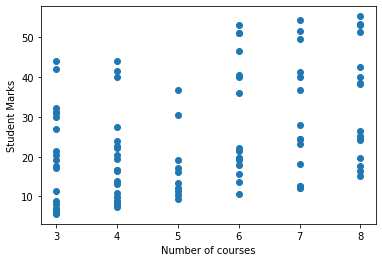

In [52]:
plt.scatter(x = df.number_courses , y=df.Marks)
plt.xlabel("Number of courses")
plt.ylabel("Student Marks")
plt.show()

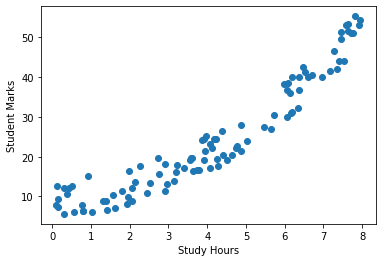

In [53]:
plt.scatter(x = df.time_study , y=df.Marks)
plt.xlabel("Study Hours")
plt.ylabel("Student Marks")
plt.show()

## **Step 2: Splitting data** 

In [54]:
import math
s_f=0.8
n_train = math.floor(s_f * df.shape[0])
n_test = math.ceil((1-s_f) * df.shape[0])
print(n_train,n_test)

df_train = df[:n_train]
df_test = df[n_train:]
df_train.head()

80 20


,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


## **Step 3: Model Implementation: Gradient Descent**

We need to fit the linear regression parameters $\theta$ to the dataset using gradient descent.

#### - ***Update Equations***

The hypothesis of linear regression is:

$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

The objective of linear regression is to minimize the cost function (Root Mean Square Error RMSE):

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 $$

To minimize the cost of $J(\theta)$ we will use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update

$$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$ 

(simultaneously update $\theta_j$ for all $j$). With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.

#### - ***Preparing data***

We need to add another dimension to our data to accommodate the $\theta_0$ intercept term. This allows us to treat $\theta_0$ as simply another feature.

In [60]:
m = df_train.shape[0]
X = np.hstack((np.ones((m,1)), df_train.time_study.values.reshape(-1,1)))
y = np.array(df_train.Marks.values).reshape(-1,1)
theta = np.zeros(shape=(X.shape[1],1))

iterations = 1500
alpha = 0.01

***- Computing the cost $J(\theta)$***

In [61]:
def compute_cost_one_variable(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * (np.sum((h - y)**2))
    return J

In [62]:
J = compute_cost_one_variable(X, y, theta)
print('Theta = [0 ; 0]\nCost computed =', J)

Theta = [0 ; 0]
Cost computed = 394.06237603125004


In [65]:
J = compute_cost_one_variable(X, y, [[-1],[2]])
print('Theta = [-1 ; 2]\nCost computed =', J)

Theta = [-1 ; 2]
Cost computed = 194.82245505625


***- Gradient Descent implementation***

Gradient descent is a generic optimization algorithm that measures the local gradient of the cost function with regards to the parameter $\theta$ and goes in the direction of descending gradient.

Algorithm:

repeat until convergence:
$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1) = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$ 

where $j=0,1$; $\alpha$ is the learning rate (the steps to update J); $\frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1)$ is a derivative.

* Learning rate to small: slow gradient descent
* Learning rate to large: gradient descent can overshoot the minimum, may fail to converge

In [64]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost_one_variable(X, y, theta)

    return theta, J_history

## **Step 4: Model Application**

In [68]:
theta, _= gradient_descent(X, y, theta, alpha, iterations)
print('Theta found by gradient descent:\n', theta)

Theta found by gradient descent:
 [[0.79734022]
 [5.72643132]]


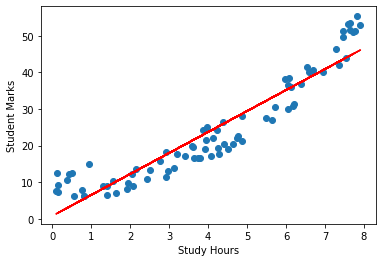

In [67]:
plt.scatter(x = df_train.time_study , y=df_train.Marks)
plt.plot(X[:,1], X.dot(theta), color='r')
plt.xlabel("Study Hours")
plt.ylabel("Student Marks")
plt.show()



## **Step 5: Model debugging: Visualizing $J(\theta)$**

The cost function $J(\theta)$ is bowl-shaped and has a global mininum. This minimum is the optimal point for $\theta_0$ and $\theta_1$, and each step of gradient descent moves closer to this point.

In [ ]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 8, 100)

J_vals = np.zeros(shape=(len(theta0_vals), len(theta1_vals)))
for i in range(0, len(theta0_vals)):
    for j in range(0, len(theta1_vals)):
        J_vals[i,j] = compute_cost_one_variable(X, y, [[theta0_vals[i]], [theta1_vals[j]]])


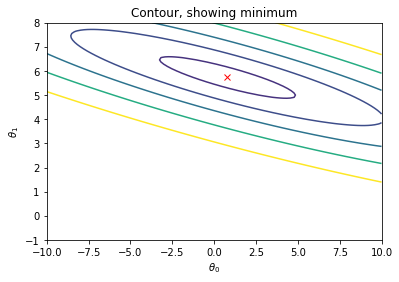

In [73]:
ax = plt.contour(theta0_vals, theta1_vals, np.transpose(J_vals), levels=np.logspace(-2,2,20))
plt.plot(theta[0,0], theta[1,0], marker='x', color='r');
plt.xlabel(r'$\theta_0$');
plt.ylabel(r'$\theta_1$');
plt.title('Contour, showing minimum');

## **Step 6: Model testing: application to test set**

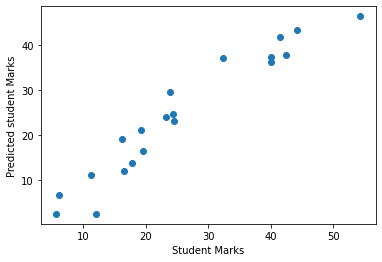

In [74]:
m_test=df_test.shape[0]
X_test = np.hstack((np.ones((m_test,1)), df_test.time_study.values.reshape(-1,1)))
y_test = np.array(df_test.Marks.values).reshape(-1,1)
y_pred = X_test.dot(theta)

plt.scatter(x = df_test.Marks , y=y_pred)
plt.xlabel("Student Marks")
plt.ylabel("Predicted student Marks")
plt.show()


In [75]:
# performance metrics
d = y_test - y_pred
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))


print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)



MAE: 3.1411854358265874
MSE: 15.973855872406725
RMSE: 3.996730647968002
R-Squared: [0.9807749]


## **Step 7: Model generalization: multivariate regression**

Now, let's consider all the variables to predict the final marks. 
We have to add some additional steps in order to address the multivariate regression task.

***-Feature Normalization***

In [ ]:
def feature_normalize(X, mean=np.zeros(1), std=np.zeros(1)):
    X = np.array(X)
    if len(mean.shape) == 1 or len(std.shape) == 1:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0, ddof=1)

    X = (X - mean)/std
    return X, mean, std

In [76]:
X_norm, mu, sigma = feature_normalize(df[['time_study', 'number_courses']])
df2=df
df2['time_study'] = X_norm[:,0]
df2['number_courses'] = X_norm[:,1]
df2.head()

,number_courses,time_study,Marks
0,-1.272559,0.181574,19.202
1,-0.716857,-1.677743,7.734
2,-0.716857,-0.397882,13.811
3,0.394549,1.614833,53.018
4,1.505955,1.573534,55.299


In [79]:
import math
s_f=0.8
n_train = math.floor(s_f * df2.shape[0])
n_test = math.ceil((1-s_f) * df2.shape[0])
print(n_train,n_test)

df2_train = df2[:n_train]
df2_test = df2[n_train:]
df2_train.head()

80 20


,number_courses,time_study,Marks
0,-1.272559,0.181574,19.202
1,-0.716857,-1.677743,7.734
2,-0.716857,-0.397882,13.811
3,0.394549,1.614833,53.018
4,1.505955,1.573534,55.299


***- Gradient Descent***

The only difference from univariate regression problem is that now there is one more feature in the matrix X. The hypothesis function and the batch gradient descent update rule remain unchanged.

Note: In the multivariate case, the cost function can also be written in the following vectorized form:

$$J(\theta) = \frac{1}{2m}(X\theta-y)^T(X\theta-y)$$

In [80]:
def compute_cost(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * ((h-y).T.dot(h-y))
    return J

In [81]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

In [82]:
m = df2_train.shape[0]
X = np.hstack((np.ones((m,1)), df2_train.time_study.values.reshape(-1,1),df2_train.number_courses.values.reshape(-1,1)))
y = np.array(df2_train.Marks.values).reshape(-1,1)
theta = np.zeros(shape=(X.shape[1],1))

iterations = 1500
alpha = 0.01

In [83]:
theta, _= gradient_descent(X, y, theta, alpha, iterations)
print('Theta found by gradient descent:\n', theta)

Theta found by gradient descent:
 [[24.51543724]
 [12.65731852]
 [ 3.79504224]]


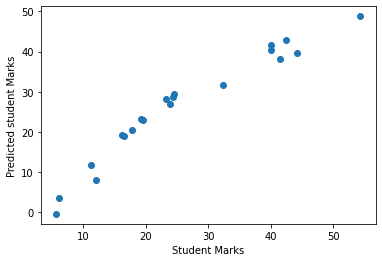

In [84]:
m_test=df2_test.shape[0]
X_test = np.hstack((np.ones((m_test,1)), df2_test.time_study.values.reshape(-1,1),df2_test.number_courses.values.reshape(-1,1)))
y_test = np.array(df2_test.Marks.values).reshape(-1,1)
y_pred = X_test.dot(theta)

plt.scatter(x = df2_test.Marks , y=y_pred)
plt.xlabel("Student Marks")
plt.ylabel("Predicted student Marks")
plt.show()


In [85]:
d = y_test - y_pred
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))


print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

MAE: 3.140894013672116
MSE: 12.674585786741597
RMSE: 3.5601384505018334
R-Squared: [0.98474569]


# **Step 8: tuning parameters**

* Make a plot with number of iterations on the x-axis. Now plot the cost function, $J(\theta)$ over the number of iterations of gradient descent. If $J(\theta)$  ever increases, then you probably need to decrease $\alpha$.


In [86]:
m = df2_train.shape[0]
X = np.hstack((np.ones((m,1)), df2_train.time_study.values.reshape(-1,1),df2_train.number_courses.values.reshape(-1,1)))
y = np.array(df2_train.Marks.values).reshape(-1,1)
theta = np.zeros(shape=(X.shape[1],1))

In [87]:
alpha = [0.4, 0.1, 0.05, 0.01]
colors = ['b','r','g','c']
num_iters = 50

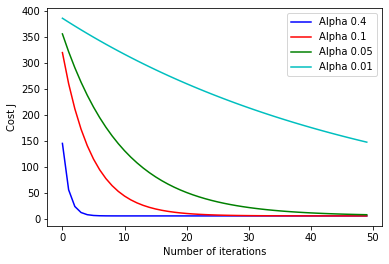

In [88]:
for i in range(0, len(alpha)):
    theta = np.zeros(shape=(X.shape[1],1))
    theta, J_history = gradient_descent(X, y, theta, alpha[i], num_iters)
    plt.plot(range(len(J_history)), J_history, colors[i], label='Alpha {}'.format(alpha[i]))
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.legend()
plt.show()

# **Step 9: Try your model on real data!**


In [89]:
iterations = 100
alpha = 0.1
theta, _ = gradient_descent(X, y, theta, alpha, iterations)
print(theta)

[[24.5149224 ]
 [12.65739119]
 [ 3.79472714]]


In [90]:
my_time = (7.5 - mu[0])/sigma[0]
my_courses = (4 - mu[1])/sigma[1]
y_pred = theta[0] + theta[1]*my_time + theta[2]*my_courses
f'You will get a final mark: {y_pred[0]}$'

'You will get a final mark: 40.052567580974326$'